In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
pwd

'F:\\Code\\Data Science'

In [7]:
df = pd.read_csv('fashion-mnist_test.csv')

In [40]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(10000, 785)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [27]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [34]:
X = df.drop("label", axis=1)
y = df["label"]

In [37]:
# Reshape the data into 28x28 images (assuming each image is 28x28 pixels)
X = X.values.reshape(-1, 28, 28)

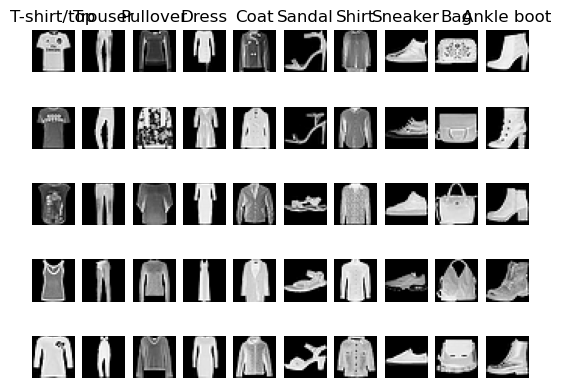

In [38]:
import matplotlib.pyplot as plt

# Define a list of class names 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Visualize a few examples from each class
num_classes = len(class_names)
examples_per_class = 5

for i in range(num_classes):
    class_indices = (y == i)
    class_images = X[class_indices][:examples_per_class]
    
    for j in range(examples_per_class):
        plt.subplot(examples_per_class, num_classes, j * num_classes + i + 1)
        plt.imshow(class_images[j], cmap="gray")
        plt.axis("off")
        if j == 0:
            plt.title(class_names[i])

plt.show()


In [44]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


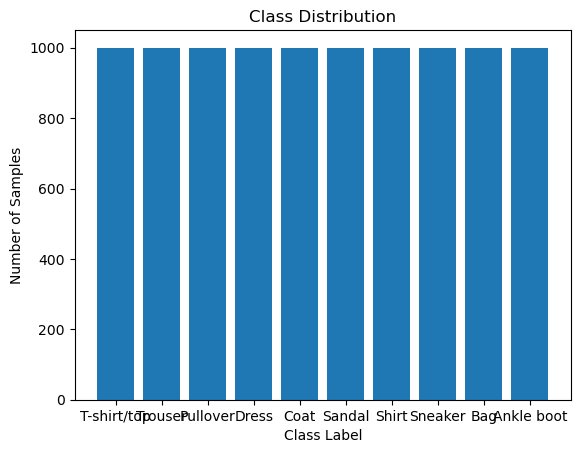

In [46]:
import matplotlib.pyplot as plt


class_counts = df["label"].value_counts().sort_index()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 
plt.bar(class_names, class_counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()


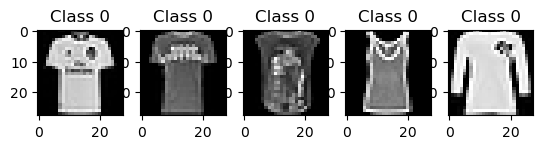

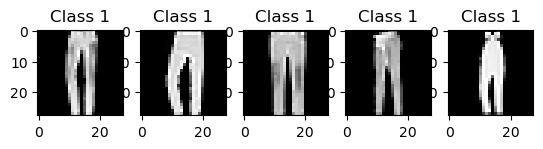

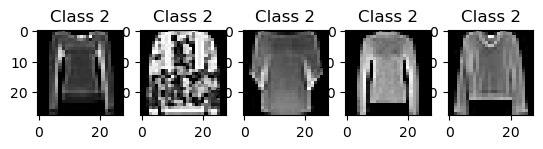

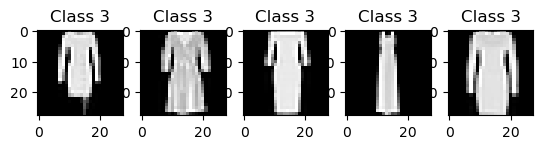

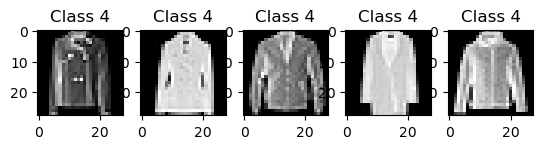

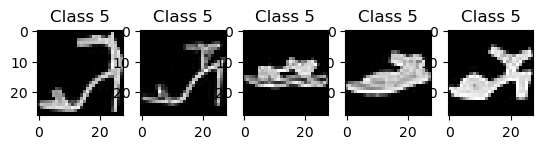

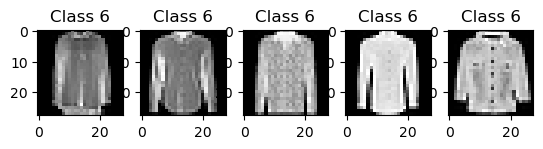

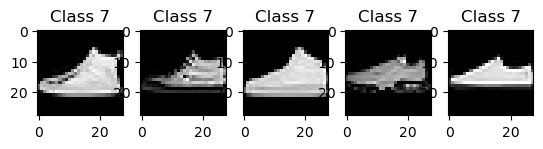

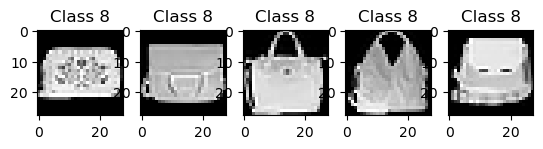

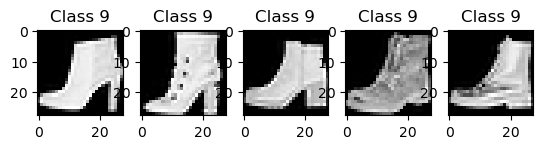

In [54]:
import matplotlib.pyplot as plt

# Assuming the pixel columns are named "pixel1", "pixel2", ...
# Replace with the actual column names
for class_label in range(10):  # Assuming 10 classes (0 to 9)
    class_samples = df[df["label"] == class_label].drop("label", axis=1).values
    for i in range(5):  # Display 5 samples from each class
        plt.subplot(1, 5, i + 1)
        plt.imshow(class_samples[i].reshape(28, 28), cmap="gray")
        plt.title(f"Class {class_label}")
    plt.show()


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


C:\Users\abira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       192
           1       0.95      0.95      0.95       192
           2       0.61      0.63      0.62       212
           3       0.82      0.80      0.81       205
           4       0.68      0.71      0.69       204
           5       0.86      0.83      0.85       193
           6       0.46      0.47      0.46       200
           7       0.85      0.83      0.84       206
           8       0.90      0.87      0.89       196
           9       0.90      0.90      0.90       200

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

[[122   3  12  11   3   0  39   0   2   0]
 [  0 183   3   6   0   0   0   0   0   0]
 [ 11   1 134   0  33   0  33   0   0   0]
 [ 15   3   6 164   7   0   8   1   1   0]
 [  4   0  31   2 144   0  22   0   1   0]
 [  0   0  

In [59]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load and preprocess the data
data = pd.read_csv("fashion-mnist_test.csv")
X = data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y = data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Save the trained model
model.save('fashion_mnist_model.h5')


Epoch 1/10
250/250 [==============================] - 7s 24ms/step - loss: 0.6601 - accuracy: 0.7717 - val_loss: 0.4550 - val_accuracy: 0.8325
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 0.3989 - accuracy: 0.8620 - val_loss: 0.4148 - val_accuracy: 0.8565
Epoch 3/10
250/250 [==============================] - 5s 21ms/step - loss: 0.3284 - accuracy: 0.8839 - val_loss: 0.3880 - val_accuracy: 0.8655
Epoch 4/10
250/250 [==============================] - 5s 20ms/step - loss: 0.2754 - accuracy: 0.9041 - val_loss: 0.3524 - val_accuracy: 0.8755
Epoch 5/10
250/250 [==============================] - 5s 20ms/step - loss: 0.2358 - accuracy: 0.9204 - val_loss: 0.3759 - val_accuracy: 0.8685
Epoch 6/10
250/250 [==============================] - 5s 20ms/step - loss: 0.2050 - accuracy: 0.9301 - val_loss: 0.3766 - val_accuracy: 0.8675
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 0.1800 - accuracy: 0.9354 - val_loss: 0.3864 - val_accuracy: 0.8715

C:\Users\abira\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and preprocess the data (as previously described)
data = pd.read_csv("fashion-mnist_test.csv")
X = data.iloc[:, 1:].values / 255.0
y = data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the initial model (as previously described)
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Confidence threshold for human validation
confidence_threshold = 0.8

# Mockup for human expert validation
def human_expert_validation(image, true_label, model_prediction):
    print("Model's prediction:", model_prediction)
    print("True label:", true_label)
    validated_label = int(input("Enter the correct label (0-9): "))
    return validated_label

# Implement human-in-the-loop workflow
correct_predictions = 0
uncertain_predictions = 0

for i in range(len(X_test)):
    image = X_test[i:i+1]  # Select one image
    true_label = y_test[i]
    
    prediction = model.predict(image)
    confidence = max(prediction[0])
    
    if confidence >= confidence_threshold:
        # Automatic prediction is confident enough, no human intervention needed
        if prediction.argmax() == true_label:
            correct_predictions += 1
    else:
        # Model is uncertain; human expert validation is required
        uncertain_predictions += 1
        corrected_label = human_expert_validation(image, true_label, prediction)
        
        # Assess the correctness of the model's prediction based on corrected label
        if corrected_label == true_label:
            print("Model's prediction was correct.")
        else:
            print("Model's prediction was incorrect. Corrected label:", corrected_label)

# Print results
print(f"Correct predictions (automatic): {correct_predictions}")
print(f"Uncertain predictions (human intervention required): {uncertain_predictions}")


Epoch 1/10
250/250 [==============================] - 6s 21ms/step - loss: 0.6207 - accuracy: 0.7837 - val_loss: 0.4233 - val_accuracy: 0.8480
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 0.3864 - accuracy: 0.8664 - val_loss: 0.3892 - val_accuracy: 0.8590
Epoch 3/10
250/250 [==============================] - 5s 20ms/step - loss: 0.3087 - accuracy: 0.8915 - val_loss: 0.3939 - val_accuracy: 0.8535
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2617 - accuracy: 0.9046 - val_loss: 0.3852 - val_accuracy: 0.8660
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2317 - accuracy: 0.9206 - val_loss: 0.3453 - val_accuracy: 0.8800
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 0.1964 - accuracy: 0.9326 - val_loss: 0.3574 - val_accuracy: 0.8760
Epoch 7/10
250/250 [==============================] - 5s 20ms/step - loss: 0.1611 - accuracy: 0.9424 - val_loss: 0.3936 - val_accuracy: 0.8785